## Taxi Fare using RF

In [1]:
import pyforest
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('E:cIN/Imarticus/TaxiFarePrediction/Taxi Fare Prediction/Dataset/TaxiFare.csv')

<IPython.core.display.Javascript object>

In [3]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
data.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [5]:
data.shape

(50000, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:


data.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [8]:


data.isna().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [9]:
data.unique_id.value_counts()

26:00.0    457
33:00.0    439
11:00.0    436
32:00.0    429
20:00.0    424
          ... 
35:15.0      1
08:37.0      1
16:50.0      1
49:14.0      1
53:10.0      1
Name: unique_id, Length: 3597, dtype: int64

In [10]:
data.date_time_of_pickup.value_counts()

2012-06-28 20:54:00 UTC    3
2011-09-03 01:30:00 UTC    3
2014-05-30 23:38:00 UTC    3
2011-02-11 13:19:00 UTC    3
2011-08-08 09:48:00 UTC    2
                          ..
2011-06-01 20:09:35 UTC    1
2013-09-28 09:38:00 UTC    1
2009-11-24 00:42:14 UTC    1
2009-12-09 19:30:00 UTC    1
2013-09-14 23:03:00 UTC    1
Name: date_time_of_pickup, Length: 49555, dtype: int64

In [11]:
data_num=data.select_dtypes(include=np.number)
data_num.columns

<IPython.core.display.Javascript object>

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger'],
      dtype='object')

In [12]:
data_cat=data.select_dtypes(include='object')
data_cat.columns

Index(['unique_id', 'date_time_of_pickup'], dtype='object')

In [13]:
corr=data.corr()
corr

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
amount,1.000000,0.005944,-0.007338,0.004286,-0.005442,0.016583
longitude_of_pickup,0.005944,1.000000,-0.950588,0.956131,-0.946968,-0.005604
latitude_of_pickup,-0.007338,-0.950588,1.000000,-0.911123,0.928189,0.003237
longitude_of_dropoff,0.004286,0.956131,-0.911123,1.000000,-0.982117,-0.004936
latitude_of_dropoff,-0.005442,-0.946968,0.928189,-0.982117,1.000000,0.002958
no_of_passenger,0.016583,-0.005604,0.003237,-0.004936,0.002958,1.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

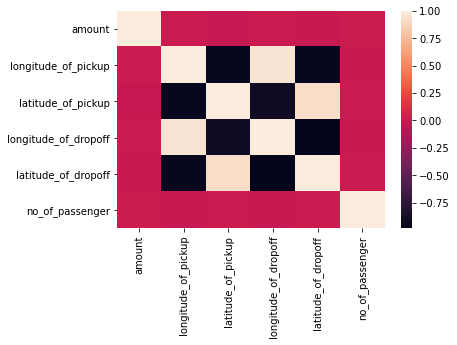

In [14]:
sns.heatmap(corr)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='amount', ylabel='Density'>

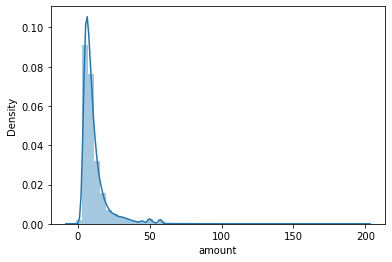

In [15]:
sns.distplot(data.amount)

In [16]:
data.amount=np.log1p(data.amount)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='amount', ylabel='Density'>

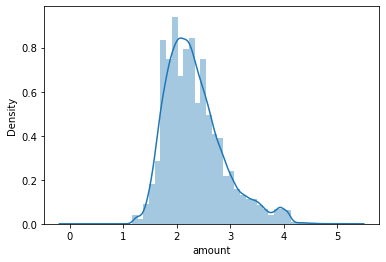

In [17]:
sns.distplot(data.amount)

In [18]:
#sns.pairplot(data=data)

In [19]:
# col_=list(['unique_id', 'date_time_of_pickup', 'longitude_of_pickup',
#        'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
#        'no_of_passenger'])
# for f in col_:
#     plt.figure(figsize=(13,7))
#     sns.barplot(f,'amount',data=data,palette='Set2')

In [20]:
# for f in col_:
#     plt.figure(figsize=(13,7))
#     sns.violinplot(f,'amount',data=data,palette='Set2')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='amount'>

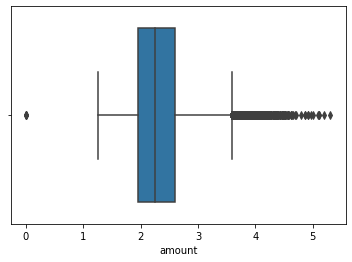

In [21]:
sns.boxplot(data.amount)

In [22]:
data.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,49994.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.335208,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,0.547996,10.393860,6.224857,10.407570,6.014737,1.289195
min,0.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,1.945910,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,2.251292,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,2.602690,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,5.303305,40.783472,401.083332,40.851027,43.415190,6.000000


In [23]:
data_cat.columns


Index(['unique_id', 'date_time_of_pickup'], dtype='object')

## Label encoding

In [24]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
data.unique_id= label_encoder.fit_transform(data.unique_id)
data.date_time_of_pickup= label_encoder.fit_transform(data.date_time_of_pickup)
 

In [25]:
data1=pd.concat([data_num,data.unique_id],axis=1)

<IPython.core.display.Javascript object>

In [26]:
data_final=pd.concat([data1,data.date_time_of_pickup],axis=1)

<IPython.core.display.Javascript object>

In [27]:
data_final.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,unique_id,date_time_of_pickup
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1579,3408
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,3133,7748
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2097,20152
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,1839,25488
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,3057,8973


In [28]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   longitude_of_pickup   50000 non-null  float64
 2   latitude_of_pickup    50000 non-null  float64
 3   longitude_of_dropoff  50000 non-null  float64
 4   latitude_of_dropoff   50000 non-null  float64
 5   no_of_passenger       50000 non-null  int64  
 6   unique_id             50000 non-null  int32  
 7   date_time_of_pickup   50000 non-null  int32  
dtypes: float64(5), int32(2), int64(1)
memory usage: 2.7 MB


In [29]:
data_final.columns

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'unique_id', 'date_time_of_pickup'],
      dtype='object')

## Train Test Split

In [30]:
x=data_final.drop(columns='amount')
y=data_final.amount

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

## Linear base line model

In [32]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [33]:
lm.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred1=lm.predict(x_test)

In [35]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

print('r2 using rf',metrics.r2_score(y_test,y_pred1))
print('mse using rf',metrics.mean_squared_error(y_test,y_pred1))

<IPython.core.display.Javascript object>

r2 using rf 0.017240584205034715


<IPython.core.display.Javascript object>

mse using rf 91.30259435695136


In [36]:
rmse1=np.sqrt(metrics.mean_squared_error(y_test,y_pred1))
rmse1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

9.555239105169026

## RF model (Bagging)

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(random_state=100)

In [38]:
rf.fit(x_train,y_train)

ypred=rf.predict(x_test)

In [39]:
rf.feature_importances_ 

array([0.24917512, 0.1157357 , 0.37663545, 0.16460322, 0.00691331,
       0.02926758, 0.05766962])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

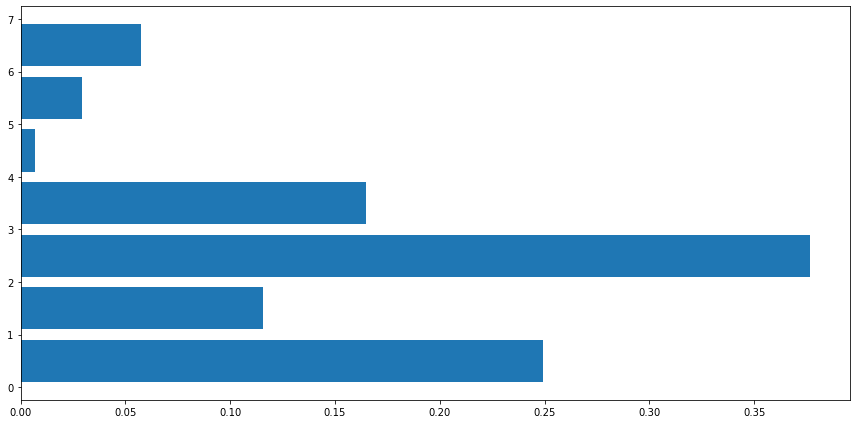

In [40]:
feature_importance=rf.feature_importances_
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
fig=plt.figure(figsize=(12,6))
plt.barh(pos,feature_importance,align='center')
fig.tight_layout()
plt.show()

In [41]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
#,mean_square_error,root_mean_square_error
print('r2 using rf',metrics.r2_score(y_test,ypred))
print('mse using rf',metrics.mean_squared_error(y_test,ypred))
#print('recall using rf',metrics.root_mean_square_error(y_test,ypred))

<IPython.core.display.Javascript object>

r2 using rf 0.7674929517627349


<IPython.core.display.Javascript object>

mse using rf 21.600909000874


In [72]:
rmse=np.sqrt(metrics.mean_squared_error(y_test,ypred))
rmse

<IPython.core.display.Javascript object>

4.647677807343577

## Hyper Parameter tuning

In [42]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [43]:
def report1(results,n_top=3):
    for i in range(1,n_top+1):
        candidates=np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0: .3f} (std: {1:.3f})'.format(results['mean_test_score'][candidate],
                                                                         results['std_test_score'][candidate]))
            print('Parameters {0}'.format(results['params'][candidate]))
            print('')

In [44]:
param_dist_={'max_depth': [3,None], 
           'max_features': sp_randint(1,11),
           'min_samples_split':sp_randint(2,11),
           'bootstrap':[True,False],
            'criterion':['mse','mae']
            }

### Random search

n_ter_search=5
random_search_=RandomizedSearchCV(rf,param_distributions=param_dist_,
                                  n_iter=n_ter_search,cv=5)

start=time()
random_search_.fit(x_train,y_train)
print('Randomozed search too %.2f seconds for %d candidates'' paramaeter settings.' 
      %((time()-start),n_ter_search))
report1(random_search_.cv_results_)

random_search_.best_params_

### Grid Search

param_dist={'max_depth': [3,None], 
           'max_features': (1,3,10),
           'min_samples_split':(1,5,10),
           'bootstrap':[True,False],
            'criterion':['mse','mae']
            }

n_ter_search=5
grid_search=GridSearchCV(rf,param_grid=param_dist,cv=5)

start=time()
grid_search.fit(x_train,y_train)
print('Grid search too %.2f seconds for %d candidates'' paramaeter settings.' 
      %((time()-start),len(grid_search.cv_results_['params'])))
report1(grid_search.cv_results_)

In [52]:
Parameters ={ 'criterion': 'mse', 'max_depth': None, 'max_features': 3, 'min_samples_split': 8}

grid_search.best_params_

# Gradient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
gbc=GradientBoostingRegressor(criterion= 'mse', max_depth= None,max_features= 3, min_samples_split= 8)
gbc.fit(x_train,y_train)
y_pred_gbc=gbc.predict(x_test)

In [64]:
print('Accuracy on Gradient boost',metrics.r2_score(y_test,y_pred_gbc))

<IPython.core.display.Javascript object>

Accuracy on Gradient boost 0.7059155891707707


# Adaboosting

In [66]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=100,
                         learning_rate=0.1)
ada.fit(x_train,y_train)
y_pred_ada=rf.predict(x_test)

In [67]:
print('Accuracy on ada boost',metrics.r2_score(y_test,y_pred_ada))

<IPython.core.display.Javascript object>

Accuracy on ada boost 0.7674929517627349
